In [1]:
import numpy as np
from matplotlib import pyplot as plt
import importlib
np.set_printoptions(precision=3, suppress=True)
# finalized libs
from symmetry import *
from unitary_representations import *
from tight_binding import *
UR = UnitaryRepresentation
# not finalized libs
import fermi_surface as fs
importlib.reload(fs)
import density_of_states as dos
importlib.reload(dos);

# Tests

In [2]:
test_d3 = UR.d3(True)
#print(*list(test_d3.U), sep="\n")
test_o3 = UR.so3()
#print(test_o3.U)
test_i = UR.one_dim(True, True, True)
test_combined = test_d3 + test_o3 + test_i
#print(test_combined.sym.S[:4])
print(np.real(test_combined.U[:4]))

[[[ 1.     0.     0.     0.     0.     0.   ]
  [ 0.     1.     0.     0.     0.     0.   ]
  [ 0.     0.     1.     0.     0.     0.   ]
  [ 0.     0.     0.     1.     0.     0.   ]
  [ 0.     0.     0.     0.     1.     0.   ]
  [ 0.     0.     0.     0.     0.     1.   ]]

 [[ 1.     0.     0.     0.     0.     0.   ]
  [ 0.     0.     1.     0.     0.     0.   ]
  [ 0.    -1.     0.     0.     0.     0.   ]
  [ 0.     0.     0.     1.     0.     0.   ]
  [ 0.     0.     0.     0.    -1.     0.   ]
  [ 0.     0.     0.     0.     0.    -1.   ]]

 [[ 0.     0.    -1.     0.     0.     0.   ]
  [ 0.     1.     0.     0.     0.     0.   ]
  [ 1.     0.     0.     0.     0.     0.   ]
  [ 0.     0.     0.    -0.5    0.866  0.   ]
  [ 0.     0.     0.     0.866  0.5    0.   ]
  [ 0.     0.     0.     0.     0.    -1.   ]]

 [[ 0.     1.     0.     0.     0.     0.   ]
  [-1.     0.     0.     0.     0.     0.   ]
  [ 0.     0.     1.     0.     0.     0.   ]
  [ 0.     0.     0.    -0.5

In [2]:
# test gradients
#u_repr = UnitaryRepresentation(Symmetry.cubic(True), 3)
u_repr = UR.one_dim(False, False, True) + UR.d3(False)
#u_repr = URep.o3()
u_repr.check_U()
tb2 = TightBindingModel(u_repr, ((0,0,0), (1,0,0), (0,1,0), (0,0,1)),
                        [random_hermitian(3),
                         random_hermitian(3),
                         random_hermitian(3),
                         random_hermitian(3)])
tb2.normalize()
print(tb2.params)

# test symmetry of bands and hamilton operator
u_repr.sym.check_symmetry(lambda k: tb2.bands(np.reshape(k, (-1, 3))))
u_repr.check_symmetry(lambda k: tb2.f(np.reshape(k, (-1, 3)))[0])

h = 1e-7
k_smpl = np.random.random((30, 3))
dx = np.reshape((h, 0, 0), (1, -1))
dy = np.reshape((0, h, 0), (1, -1))
dz = np.reshape((0, 0, h), (1, -1))

# test gradients
bands, grads = tb2.bands_grad(k_smpl)
bandsx = tb2.bands(k_smpl + dx)
bandsy = tb2.bands(k_smpl + dy)
bandsz = tb2.bands(k_smpl + dz)
# the following should be of order h
print(np.linalg.norm(bands + (grads * dx.reshape(1,-1,1)).sum(1) - bandsx) / h)
print(np.linalg.norm(bands + (grads * dy.reshape(1,-1,1)).sum(1) - bandsy) / h)
print(np.linalg.norm(bands + (grads * dz.reshape(1,-1,1)).sum(1) - bandsz) / h)

# test hessians
k_smpl = np.random.random((30, 3))
bands, grads, hess = tb2.bands_grad_hess(k_smpl)
#print(np.linalg.norm(hess, axis=(0, -1)))
bandsx, gradsx = tb2.bands_grad(k_smpl + dx)
bandsy, gradsy = tb2.bands_grad(k_smpl + dy)
bandsz, gradsz = tb2.bands_grad(k_smpl + dz)
# the following should be of order h
print(np.linalg.norm(grads + hess[:,:,0]*h - gradsx, axis=(0,2)) / h)
print(np.linalg.norm(grads + hess[:,:,1]*h - gradsy, axis=(0,2)) / h)
print(np.linalg.norm(grads + hess[:,:,2]*h - gradsz, axis=(0,2)) / h)


[[[ 0.899+0.j     0.   -0.j     0.   +0.j   ]
  [ 0.   +0.j     0.189-0.j    -0.   +0.j   ]
  [ 0.   +0.j    -0.   -0.j     0.189-0.j   ]]

 [[ 0.657+0.j    -0.095+0.161j  0.   +0.j   ]
  [-0.095-0.161j -0.041+0.j     0.   -0.j   ]
  [ 0.   -0.j     0.   +0.j    -0.293+0.j   ]]

 [[ 0.657+0.j     0.047-0.08j   0.082-0.139j]
  [ 0.047+0.08j  -0.23 -0.j     0.109+0.j   ]
  [ 0.082+0.139j  0.109-0.j    -0.104-0.j   ]]

 [[ 0.657+0.j     0.047-0.08j  -0.082+0.139j]
  [ 0.047+0.08j  -0.23 -0.j    -0.109+0.j   ]
  [-0.082-0.139j -0.109-0.j    -0.104-0.j   ]]]
5.658995406675017e-06
7.950479290144118e-06
7.4304060471824234e-06
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]


[[[ 1.786+0.j    -0.849+0.329j -0.625-1.308j]
  [-0.849-0.329j  1.998+0.j    -0.02 -0.051j]
  [-0.625+1.308j -0.02 +0.051j  1.246+0.j   ]]

 [[-0.77 +0.j    -1.094+0.548j -1.096+0.145j]
  [-1.094-0.548j  1.042+0.j    -0.882-0.038j]
  [-1.096-0.145j -0.882+0.038j -0.461+0.j   ]]

 [[ 0.697+0.j     0.729-0.261j  1.274-0.555j]
  [ 0.729+0.261j -0.939+0.j    -0.519+0.339j]
  [ 1.274+0.555j -0.519-0.339j  0.304+0.j   ]]]
loss: 3.29e-01
loss: 1.77e-01
loss: 5.74e-02
loss: 5.69e-02
loss: 3.41e-02
loss: 2.81e-02
loss: 1.09e-02
loss: 6.22e-03
loss: 4.04e-03
loss: 4.04e-03
final loss: 0.0019528768841956038
[[[ 1.684+0.j    -0.586+0.638j -0.299+0.235j]
  [-0.586-0.638j  0.372-0.j     0.42 +0.578j]
  [-0.299-0.235j  0.42 -0.578j  2.961-0.j   ]]

 [[-0.1  +0.j    -0.694+0.992j  0.585-0.69j ]
  [-0.694-0.992j  0.008+0.j     1.163-0.134j]
  [ 0.585+0.69j   1.163+0.134j -0.087-0.j   ]]

 [[-0.165+0.j     0.915-0.639j -0.027+0.78j ]
  [ 0.915+0.639j -0.161+0.j    -0.869-0.363j]
  [-0.027-0.78j  -0.869+

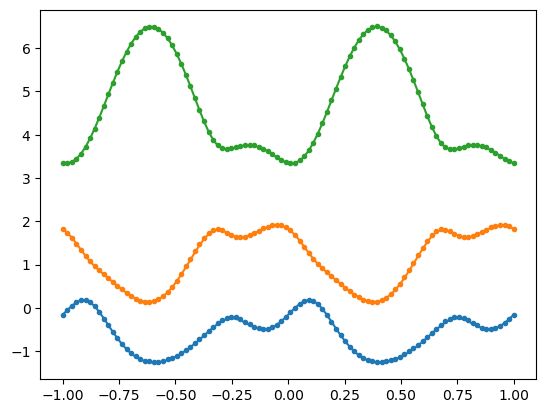

In [4]:
# TODO do this test for non matching unitary representations
# NOTE the following does sometimes not converge for unknown reasons, but that was already in v2 that way
u_repr = UnitaryRepresentation(Symmetry.one_dim(False), 3)
tb2 = TightBindingModel(u_repr, ((0,), (1,)),
                        [random_hermitian(3),
                         random_hermitian(3),
                         random_hermitian(3)])

tb2_ref = TightBindingModel(u_repr, ((0,), (1,)),
                        [random_hermitian(3),
                         random_hermitian(3),
                         random_hermitian(3)])
tb2_ref.normalize()
print(tb2_ref.params)

k_smpl = np.linspace(-1, 1, 100).reshape(-1, 1)

ref_bands = tb2_ref.bands(k_smpl)
tb2.optimize(k_smpl, 1, ref_bands, [1, 1, 1], 0, 1000)
print("final loss:", tb2.loss(k_smpl, ref_bands, [1, 1, 1], 0))
print(tb2.params)

tb2_ref.plot_bands(k_smpl, '.')
tb2.plot_bands(k_smpl, '-')

[[[ 0.111+0.j     0.   +0.j     0.   +0.j   ]
  [ 0.   +0.j    -0.072+0.j     0.638+0.033j]
  [ 0.   +0.j     0.638-0.033j -0.89 +0.j   ]]

 [[ 1.24 +0.j    -0.234-0.965j -1.546+0.084j]
  [-0.234+0.965j -1.863+0.j     1.002+0.474j]
  [-1.546-0.084j  1.002-0.474j  1.692+0.j   ]]]
loss: 9.39e-02
loss: 2.35e-01
loss: 1.28e-01
loss: 4.60e-02
loss: 3.72e-02
loss: 2.13e-02
loss: 6.76e-03
loss: 8.59e-03
loss: 5.23e-03
loss: 2.97e-03
final loss: 0.0024116621763531575
[[[ 0.294+0.j     0.   +0.j     0.   +0.j   ]
  [ 0.   +0.j    -0.731-0.j    -0.327+0.564j]
  [ 0.   +0.j    -0.327-0.564j -0.418+0.j   ]]

 [[ 1.317+0.j     0.853-0.409j  1.038-1.701j]
  [ 0.853+0.409j -1.834+0.j    -1.453+0.824j]
  [ 1.038+1.701j -1.453-0.824j  1.592+0.j   ]]]


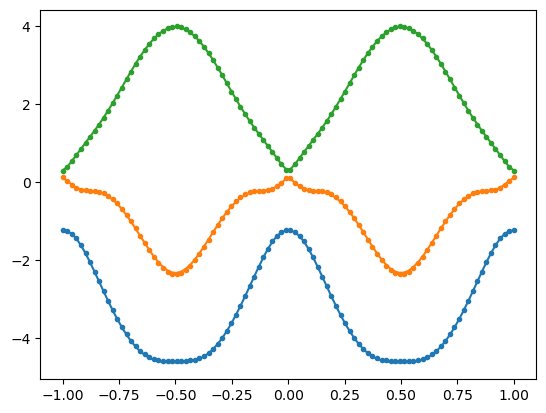

In [6]:
# TODO do this test for non matching unitary representations
# NOTE the following does sometimes not converge for unknown reasons, but that was already in v2 that way
u_repr = UnitaryRepresentation(Symmetry.one_dim(True), 3)
u_repr.inv_split = 1
tb2 = TightBindingModel(u_repr, ((0,), (1,)),
                        [random_hermitian(3)*0.1,
                         random_hermitian(3)*0.1])

tb2_ref = TightBindingModel(u_repr, ((0,), (1,)),
                        [random_hermitian(3),
                         random_hermitian(3)])
tb2_ref.normalize()
print(tb2_ref.params)

k_smpl = np.linspace(-1, 1, 100).reshape(-1, 1)

ref_bands = tb2_ref.bands(k_smpl)
tb2.optimize(k_smpl, 1, ref_bands, [1, 1, 1], 0, 1000, learning_rate=1.0)
print("final loss:", tb2.loss(k_smpl, ref_bands, [1, 1, 1], 0))
print(tb2.params)

tb2_ref.plot_bands(k_smpl, '.')
tb2.plot_bands(k_smpl, '-')

loss: 1.59e-01
loss: 8.60e-02
loss: 7.33e-02
loss: 5.44e-02
loss: 3.60e-02
loss: 2.56e-02
loss: 1.67e-02
loss: 1.19e-02
loss: 7.50e-03
loss: 4.95e-03
final loss: 0.0011313379362456087


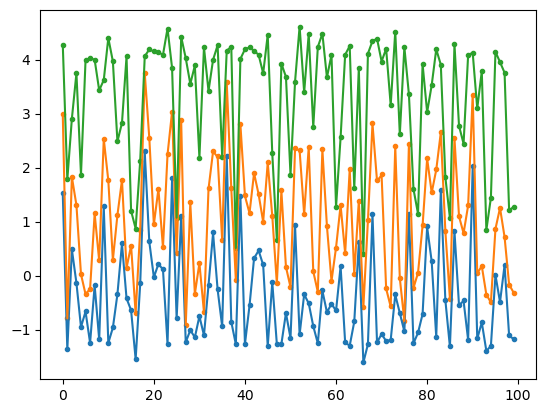

In [8]:
# TODO do this test for non matching unitary representations
# NOTE the following does sometimes not converge for unknown reasons, but that was already in v2 that way
u_repr = UR.one_dim(True, True, True) + UR.d3(True)
neighbors = ((0,0,0), (1,0,0), (0,1,0), (0,0,1))
tb2 = TightBindingModel(u_repr, neighbors,
                        [random_hermitian(3),
                         random_hermitian(3),
                         random_hermitian(3),
                         random_hermitian(3)])

tb2_ref = TightBindingModel(u_repr, neighbors,
                        [random_hermitian(3),
                         random_hermitian(3),
                         random_hermitian(3),
                         random_hermitian(3)])
tb2_ref.normalize()
#print(tb2_ref.params)
#tb2_ref.normalize()
#print(tb2_ref.params)

k_smpl = np.random.random((100, 3)) * 2

ref_bands = tb2_ref.bands(k_smpl)
tb2.optimize(k_smpl, 1, ref_bands, [1, 1, 1], 0, 1000, learning_rate=1.0)
print("final loss:", tb2.loss(k_smpl, ref_bands, [1, 1, 1], 0))
#print(tb2.params)

tb2_ref.plot_bands(k_smpl, '.')
tb2.plot_bands(k_smpl, '-')

# Real Data

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import importlib
np.set_printoptions(precision=3, suppress=True)
# finalized libs
from symmetry import *
from unitary_representations import *
from tight_binding import *
UR = UnitaryRepresentation
# not finalized libs
import fermi_surface as fs
importlib.reload(fs)
import density_of_states as dos
importlib.reload(dos);

using 12  data bands
using 14  model bands
unique band energies: 6
irreducible symmetry sizes (data):  {1: 2, 2: 2, 3: 2}
irreducible symmetry sizes (model): {1: 1, 2: 2, 3: 3}
ordered degeneracies:
data:  [1, 2, 3, 2, 3, 1]
model: [1, 2, 3, 2, 3, 3]
final loss: 5.29e-02
final loss: 4.05e-02
final loss: 2.57e-02
final loss: 1.76e-02
final loss: 1.75e-02


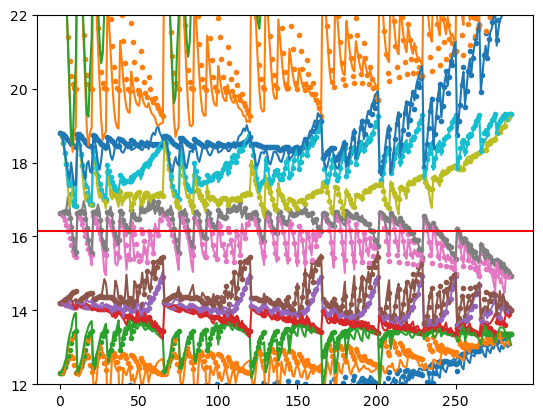

In [3]:
# sc crystal
basis_transform = np.eye(3)
# bcc crystal
#basis_transform = np.array([[-1, 1, 1], [1, -1, 1], [1, 1, -1]]) / 2.0
# fcc crystal
#basis_transform = np.array([[0, 1, 1], [1, 0, 1], [1, 1, 0]]) / 2.0
#neighbor_R = ((0, 0, 0), (1, 0, 0), (1, 1, 0), (1, 1, 1), (2, 0, 0), (2, 1, 0), (2, 1, 1), (2, 2, 1), (2, 2, 2), (3, 0, 0)) # works well
#neighbor_R = ((0,0,0), (1,0,0), (0,1,0), (0,0,1))
#neighbor_R = ((0,0,0), (1,0,0), (0,1,0), (0,0,1), (1,1,0), (1,-1,0), (1,0,1), (1,0,-1), (0,1,1), (0,1,-1))
#neighbor_R = ((0,0,0), (1,0,0), (0,1,0), (0,0,1), (1,1,0), (1,-1,0), (1,0,1), (1,0,-1), (0,1,1), (0,1,-1), (1,1,1), (1,-1,1), (1,1,-1), (1,-1,-1))
neighbor_R = ((0,0,0), (1,0,0), (0,1,0), (0,0,1), (1,1,0), (1,-1,0), (1,0,1), (1,0,-1), (0,1,1), (0,1,-1), (1,1,1), (1,-1,1), (1,1,-1), (1,-1,-1), (2,0,0), (0,2,0), (0,0,2))
neighbor_R = (basis_transform @ np.asarray(neighbor_R).T).T
#u_repr = UR.one_dim(False, False, True) * 9
#u_repr = UR.one_dim(False, False, True)*6 + UR.o3() # error still goes down well
#u_repr = UR.one_dim(False, True, True)*3 + UR.o3() * 2 # good looking/expressive fermi surface
#u_repr = UR.one_dim(False, True, True) + UR.o3()*2 + UR.d3(False) # better than 9*s
#u_repr = (UR.one_dim(True, True, True) + UR.one_dim(False, False, True) + UR.o3() + UR.so3() + UR.d3(False)) * 2
#u_repr = UR.one_dim(False, False, True) + UR.so3() * 2 + UR.d3(False) * 2 + UR.o3()
u_repr = UR.one_dim(False, False, True) + UR.d3(False) + UR.so3() + UR.d3(False) + UR.so3() + UR.o3()
band_offset = 0 # = additional bands below reference

import qespresso_interface as qe
material = qe.QECrystal("nitinol_0K", [], [], [], 0)
k_smpl, ref_weights, ref_bands, symmetries, fermi_energy = material.read_bands()
all_ref_bands = ref_bands
ref_bands = ref_bands[:,8:]

# now start my algorithm to find good matrices

weights = np.ones(len(ref_bands[0]))
weights[0] = 0.005
weights[1] = 0.005
weights[2] = 0.05
weights[3] = 0.5
weights[-1] = 0.005
weights[-2] = 0.05
weights[-3] = 0.5

print("using", len(ref_bands[0]), " data bands")
print("using", len(u_repr.U[0]), " model bands")

tb_nitinol = TightBindingModel.init_from_ref(u_repr, neighbor_R, k_smpl, ref_bands, use_repr_order=True, verbose=True)
#print(np.real(np.diag(tb_nitinol.f([(0,0,0)])[0])))
#print(ref_bands[0])
# optimize the region around k=0 and the high symmetry parts to get started
ref_weights = ref_weights / np.max(ref_weights)
sym_weights = 1 / ref_weights
select = sym_weights > 1.5
tb_nitinol.optimize(k_smpl[select], sym_weights[select], ref_bands[select], 1, band_offset, 500, batch_div=4, train_k0=False)
# now fully optimize
tb_nitinol.optimize(k_smpl, ref_weights, ref_bands, 1, band_offset, 500, batch_div=8, train_k0=False)
tb_nitinol.optimize(k_smpl[select], sym_weights[select], ref_bands[select], weights, band_offset, 100, batch_div=4, train_k0=False)
tb_nitinol.optimize(k_smpl, ref_weights, ref_bands, weights, band_offset, 800, batch_div=4, train_k0=False)
# now also let the k=0 point free to get overall better error bounds
tb_nitinol.optimize(k_smpl, ref_weights, ref_bands, weights, band_offset, 100, batch_div=1, train_k0=True)

plot_bands_generic(k_smpl, ref_bands, '.')
tb_nitinol.plot_bands(k_smpl)
plt.axhline(fermi_energy, color="r")
plt.ylim(12, 22)
plt.show()

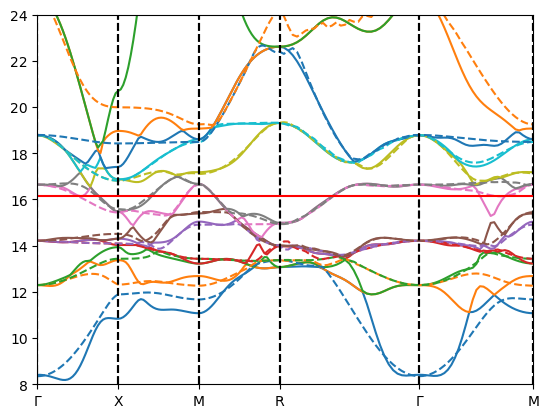

In [4]:
import kpaths
path = kpaths.KPath('G').to('X').to('M').to('R').to('G').to('M')
interpolator = kpaths.interpolate(k_smpl, ref_bands, Symmetry.cubic(True), method='cubic')
path.plot(tb_nitinol, '-')
path.plot(interpolator, '--')
plt.axhline(fermi_energy, color="r")
plt.ylim(8, 24)
plt.show()

In [4]:
for i, (r, mat) in enumerate(zip(list(neighbor_R) + list(neighbor_R)[1:], tb_nitinol.params)):
    print(r, np.linalg.norm(mat), "real" if np.linalg.norm(np.imag(mat)) < 1e-8 else "complex")

[0. 0. 0.] 66.62645355762898 real
[1. 0. 0.] 3.416531937154188 complex
[0. 1. 0.] 3.416531937154188 complex
[0. 0. 1.] 3.416531937154189 complex
[1. 1. 0.] 2.461599162454873 complex
[ 1. -1.  0.] 2.4615991624548736 complex
[1. 0. 1.] 2.461599162454873 complex
[ 1.  0. -1.] 2.461599162454873 complex
[0. 1. 1.] 2.461599162454873 complex
[ 0.  1. -1.] 2.461599162454873 complex
[1. 1. 1.] 2.75314956869038 complex
[ 1. -1.  1.] 2.75314956869038 complex
[ 1.  1. -1.] 2.75314956869038 complex
[ 1. -1. -1.] 2.75314956869038 complex


In [ ]:
tb_nitinol.unitary_repr.check_symmetry(lambda k: tb_nitinol.f(np.reshape(k, (-1, 3)))[0])

True

In [13]:
bands = tuple(np.round(tb_nitinol.bands([(0.5, 0.5, 0.5)])[0], 4))
# best order (-87.103, -47.555, -47.555, -47.555, -40.737, -16.949, -16.949, -16.949, 8.35, 12.296, 12.296, 14.212, 14.212, 14.212, 16.636, 16.636, 18.793, 18.793, 18.793, 24.807)
# question: what makes this order special in terms of the fermi surface having the gap that is often missing?
print(bands)
unique = set(bands)
print("unique values:", len(unique))
print("1-sym:", len([b for b in unique if len([1 for b2 in bands if b2 == b]) == 1]))
print("2-sym:", len([b for b in unique if len([1 for b2 in bands if b2 == b]) == 2]))
print("3-sym:", len([b for b in unique if len([1 for b2 in bands if b2 == b]) == 3]))

(13.3394, 13.3394, 13.3394, 13.9796, 13.9796, 13.9796, 14.9477, 14.9477, 19.486, 19.486, 19.486, 21.7462, 21.7462, 123.0598)
unique values: 6
1-sym: 1
2-sym: 2
3-sym: 3


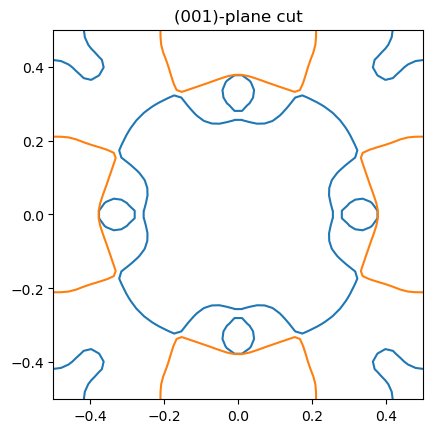

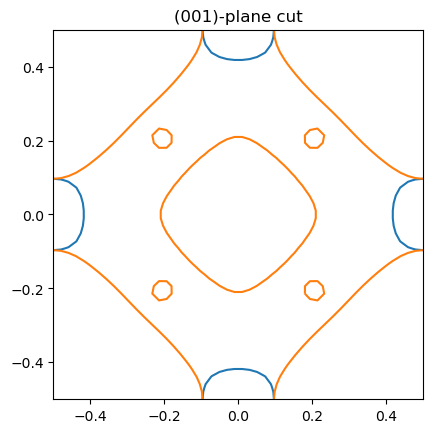

In [5]:
# 107 Czycholl (4.53) -> Symmetrie
# 2d fermi surface cuts
fs.plot_2D_fermi_surface(tb_nitinol, fermi_energy, N=50)

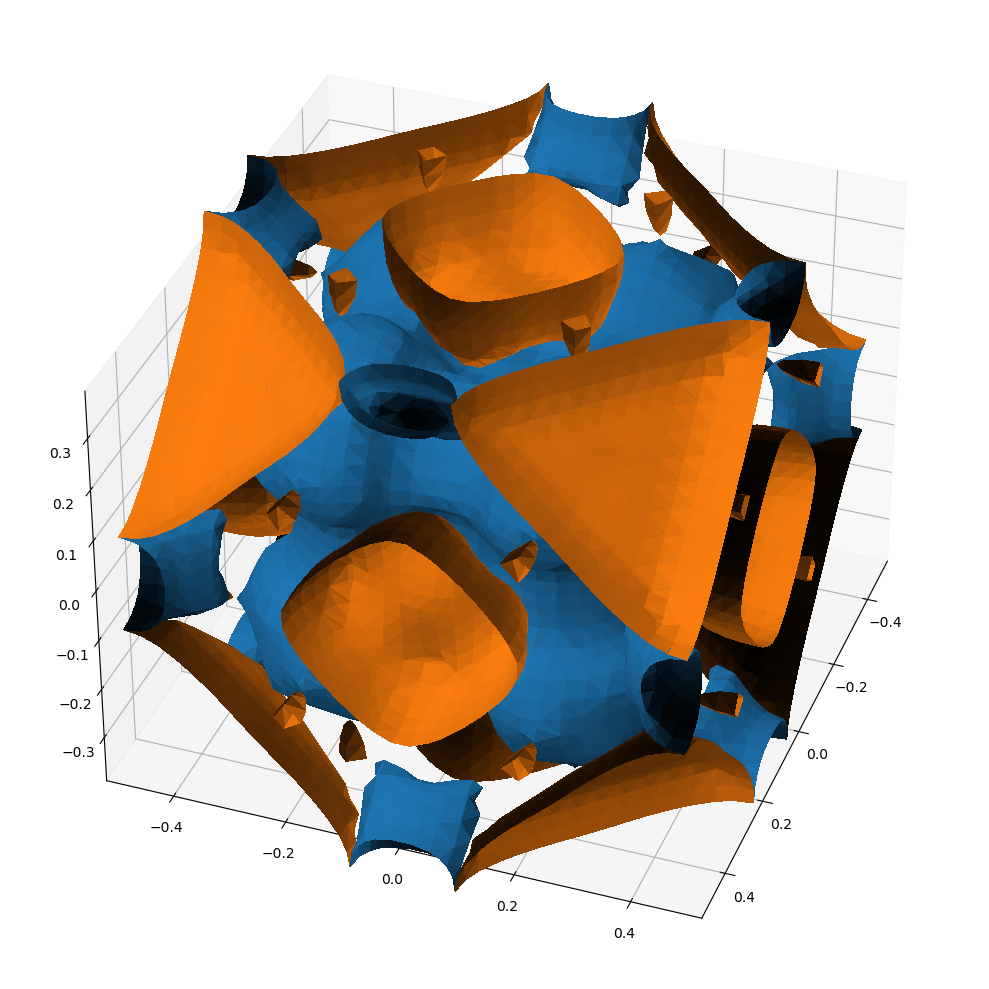

In [6]:
# plot the fermi surface
fs.plot_3D_fermi_surface(tb_nitinol, fermi_energy, N=32)

In [19]:
# calculate conductivity (Czycholl page 269)
tau = 1 # in s
elementary_charge = 1.602176634e-19 # in Coulomb
eV = elementary_charge # 1 eV in Joule
fermi_energy = 16.157 # in eV
T = 10
kB = 8.61733326214518e-5 # in eV/K
beta = 1 / (kB * T) # in 1/eV
alat = 2.993e-10 # m
hbar = 1.05457181764616e-34 # in SI J*s
k_unit = np.pi/2/alat # 1/m
def fermi(x):
    #return 1 / (1 + np.exp(x))
    return (np.tanh(-0.5 * x) + 1) * 0.5
def dfermi(x): # ~ exp(-x*x/5)/4
    #e = np.exp(x)
    #return -1 / (e + 2 + 1/e)
    return -0.25 / np.cosh(0.5 * x)**2
N = 32
k_smpl = np.meshgrid(np.linspace(0, 1, N, endpoint=False), np.linspace(0, 1, N, endpoint=False), np.linspace(0, 1, N, endpoint=False))
k_smpl += np.random.random(np.shape(k_smpl)) * ((1 - 0) / N) # this improves the integral a lot because it breaks symmetry -> *len(sym_group) integration sites
k_smpl = np.stack(k_smpl, axis=-1).reshape(-1, 3)
bands, grads = tb_nitinol.bands_grad(k_smpl)
v = grads * (eV / k_unit / hbar) # in m/s
#print(np.mean(np.mean(np.abs(v), axis=0), axis=1))
#print(np.mean(v)/np.mean(np.abs(v))) # this should be 0 for perfect sampling
# simplest integral formula
data = np.einsum("iaj,ibj,ij->iab", v, v, -dfermi((bands - fermi_energy) * beta))
I = np.mean(data, axis=0) # result is m^2/s^2 /beta ?
err = np.std(data, axis=0) / len(data)**0.5
sigma = 2 * elementary_charge**2 * tau * (beta*I)/eV / alat**3 # result is in 1/(Ohm*m)
avg_sigma = np.trace(sigma)/3
print(f"{sigma/avg_sigma}*{avg_sigma:.3e}\nwith error\n{err/np.abs(I)*100}%")

[[0.807 0.011 0.03 ]
 [0.011 1.05  0.009]
 [0.03  0.009 1.143]]*1.476e+22
with error
[[ 10.433 444.534 178.667]
 [444.534  11.621 821.669]
 [178.667 821.669  17.723]]%


/tmp/ipykernel_460309/2388438754.py:18: RuntimeWarning: overflow encountered in cosh
  return -0.25 / np.cosh(0.5 * x)**2
/tmp/ipykernel_460309/2388438754.py:18: RuntimeWarning: overflow encountered in square
  return -0.25 / np.cosh(0.5 * x)**2


In [ ]:
sigma_ref = 1 / 8.2e-8 # 1/(Ohm*m) Austenit (sc)
print(f"{sigma_ref:.2e}")
sigma_ref = 1 / 7.6e-8 # 1/(Ohm*m) Martensite
print(f"{sigma_ref:.2e}")

1.22e+07
1.32e+07
